# NYC Airbnb Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
dataset = pd.read_csv("AB_NYC_2019.csv")

### Exploration and Data Cleaning

In [3]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [77]:
dataset['name'].fillna('Unknown', inplace=True)

In [78]:
dataset['host_name'].fillna('Unknown Host', inplace=True)

### Correlations 

<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

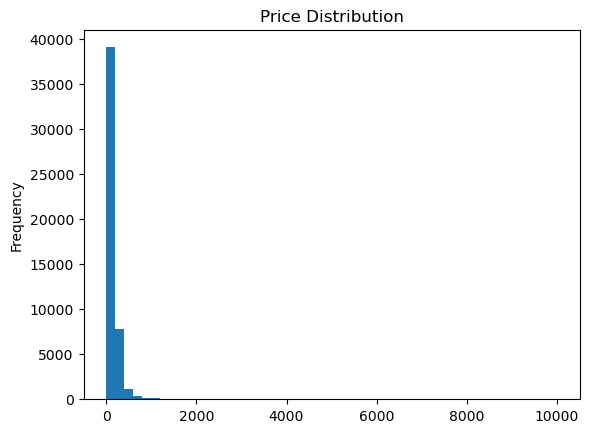

In [31]:
dataset['price'].plot(kind='hist', bins=50, title='Price Distribution')

In [24]:
dataset["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [25]:
dataset["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [22]:
price_by_room_type = dataset.groupby('room_type')['price'].mean().sort_values(ascending=False)

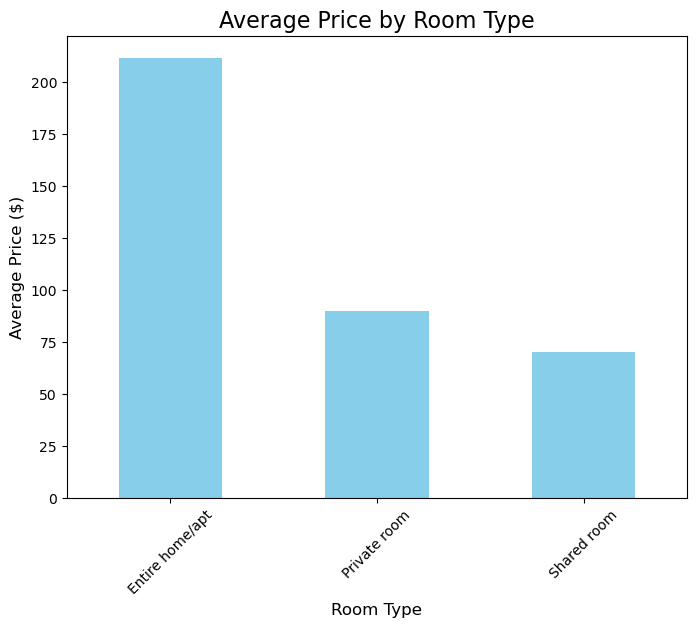

In [23]:
plt.figure(figsize=(8,6))
price_by_room_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The above Bar plot shows that the price of an 'Entire home/apt' is significantly higher than the other room types (Private room, Shared room). The obvious difference is due to factors like,<br> - Privacy and Exclusivity<br> - Size of the Property<br> - Amenities and Facilities<br> - Longer Stays and Group Accommodation <br> and much more factors.

#### Count of each type of room
Entire home/apt  -  25409 <br>
Private room     -  22326 <br>
Shared room      -  1160  <br>

We cannot simply conclude that an "Entire home/apt" is the most expensive option. Other factors, such as the neighborhood, number of reviews, and seasonality, must also be taken into account before making any definitive statements about pricing.

In [33]:
active_hosts = dataset.groupby('host_name').agg({'number_of_reviews':'sum', 'calculated_host_listings_count':'mean'})
active_hosts_sorted = active_hosts.sort_values(by='number_of_reviews', ascending=False)

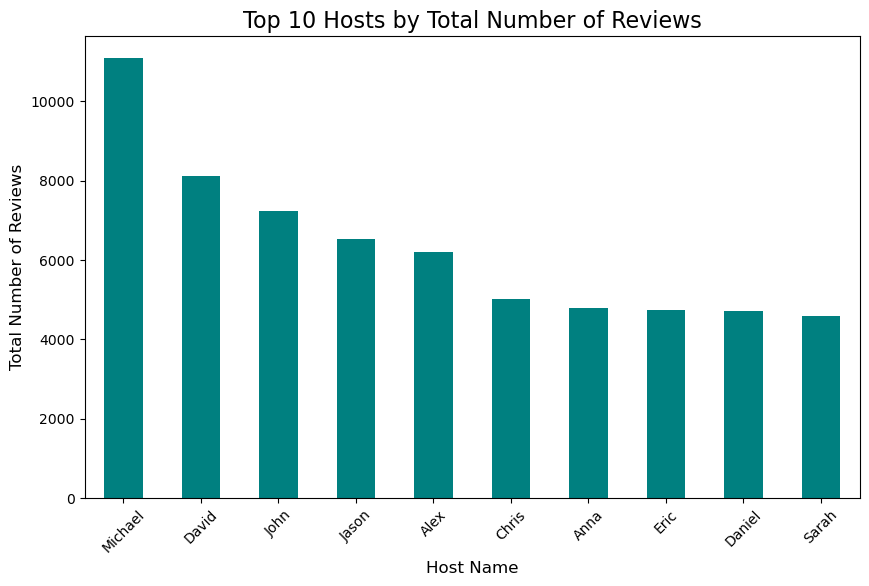

In [34]:
plt.figure(figsize=(10,6))
active_hosts_sorted['number_of_reviews'].head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Hosts by Total Number of Reviews', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.show()

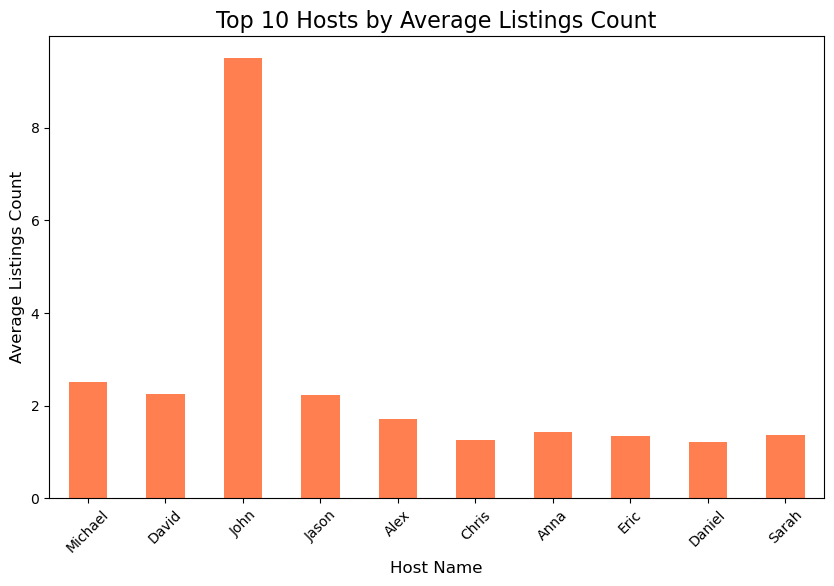

In [35]:
plt.figure(figsize=(10,6))
active_hosts_sorted['calculated_host_listings_count'].head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Hosts by Average Listings Count', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Average Listings Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

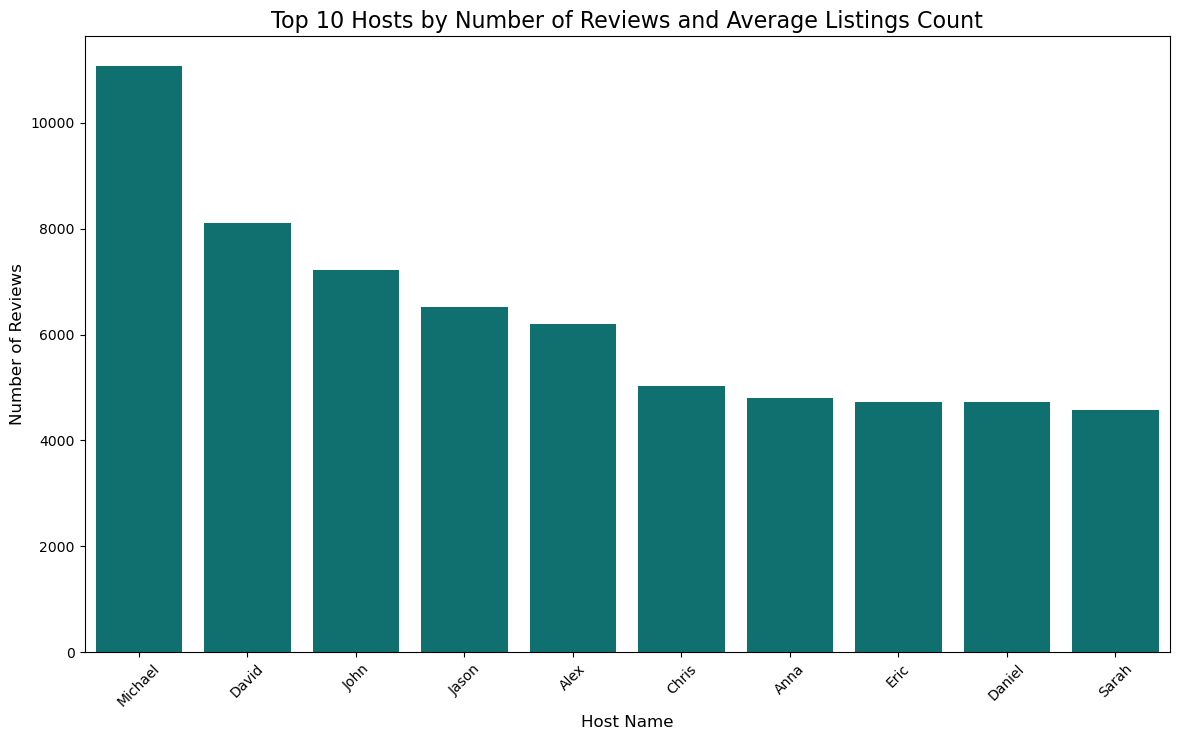

In [44]:
active_hosts_sorted = active_hosts_sorted.reset_index()

# Plotting the number of reviews and listings count side by side for top 10 hosts
plt.figure(figsize=(14,8))

# Bar plot for number of reviews
sns.barplot(x='host_name', y='number_of_reviews', data=active_hosts_sorted.head(10), color='teal', label='Number of Reviews')

# Adding labels
plt.title('Top 10 Hosts by Number of Reviews and Average Listings Count', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Axes: xlabel='price', ylabel='number_of_reviews'>

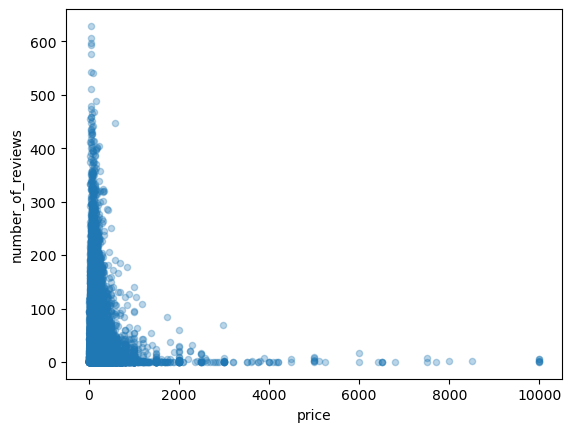

In [40]:
dataset.plot(kind='scatter', x='price', y='number_of_reviews', alpha=0.3)

In [42]:
correlation = dataset[['price', 'number_of_reviews']].corr()

In [43]:
correlation

,price,number_of_reviews
price,1.000000,-0.047954
number_of_reviews,-0.047954,1.000000


The graph shows a negative correlation between price and the number of reviews, with lower-priced properties getting more reviews and higher-priced ones getting fewer. Most listings are priced under 2000, and properties under 500 tend to have the most reviews, sometimes over 600. Listings over 5000 are rare and have very few reviews, indicating they are less popular. In summary, cheaper properties attract more reviews, while expensive ones are reviewed less often.

In [85]:
neighbourhood_stats = dataset.groupby('neighbourhood_group').agg(
    average_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
).reset_index()

# Display the neighbourhood statistics
print(neighbourhood_stats)

  neighbourhood_group  average_price  total_reviews
0               Bronx      87.496792          28371
1            Brooklyn     124.383207         486574
2           Manhattan     196.875814         454569
3              Queens      99.517649         156950
4       Staten Island     114.812332          11541


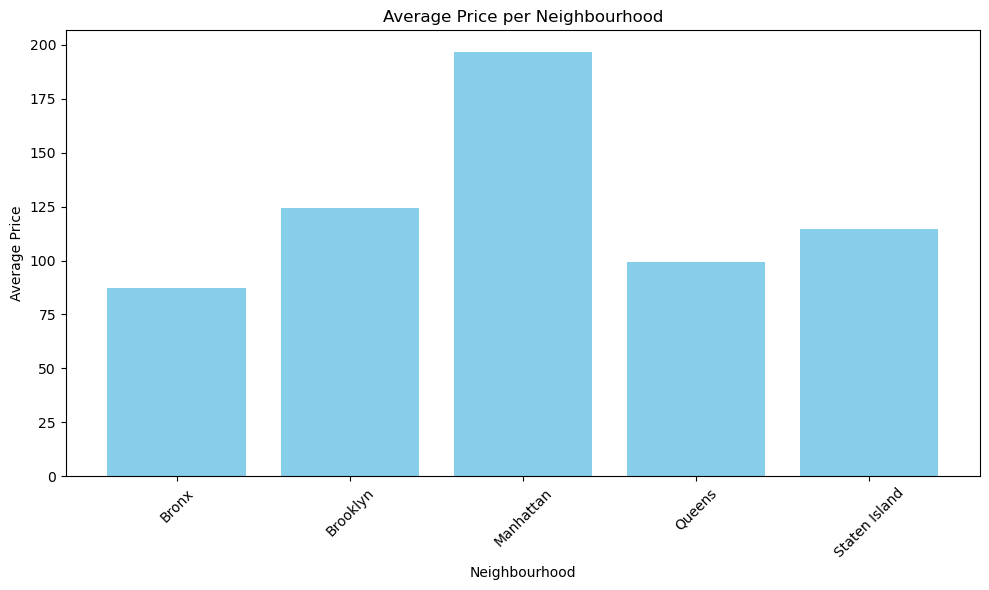

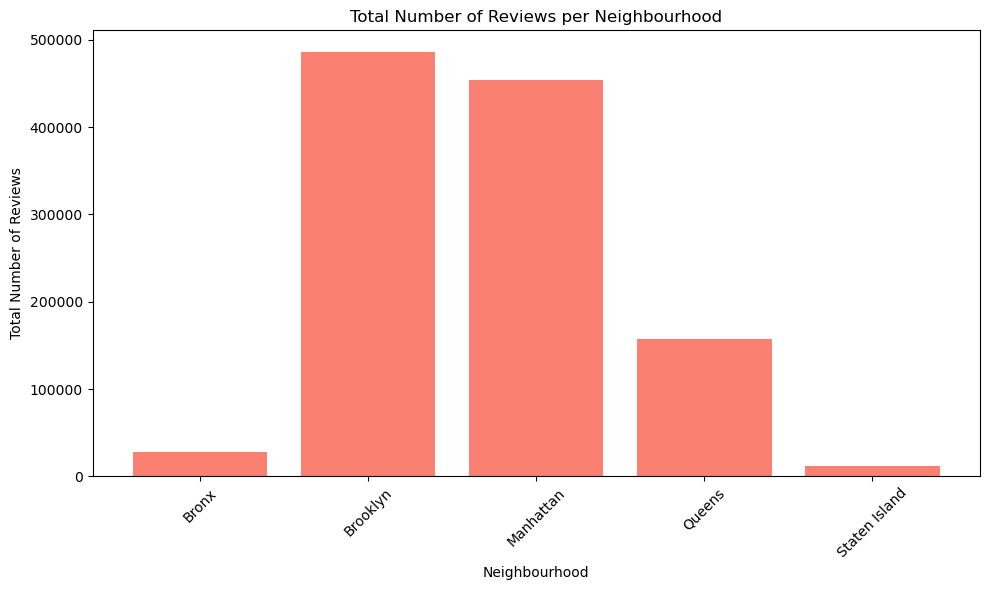

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(neighbourhood_stats['neighbourhood_group'], neighbourhood_stats['average_price'], color='skyblue')
plt.title('Average Price per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot for Total Number of Reviews
plt.figure(figsize=(10, 6))
plt.bar(neighbourhood_stats['neighbourhood_group'], neighbourhood_stats['total_reviews'], color='salmon')
plt.title('Total Number of Reviews per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x26131a66590>,
 [Text(-0.08606546444889421, 1.096627893056344, 'Bronx'),
  Text(-1.0972355927623947, 0.07793621735340049, 'Brooklyn'),
  Text(0.898850132317604, -0.634088668588728, 'Manhattan'),
  Text(0.5244685611486255, 0.966919194331507, 'Queens'),
  Text(0.035040297027736825, 1.0994417572496544, 'Staten Island')],
 [Text(-0.04694479879030593, 0.5981606689398239, '2.5%'),
  Text(-0.5984921415067607, 0.04251066401094571, '42.8%'),
  Text(0.4902818903550567, -0.3458665465029425, '39.9%'),
  Text(0.28607376062652295, 0.5274104696353674, '13.8%'),
  Text(0.019112889287856448, 0.5996955039543569, '1.0%')])

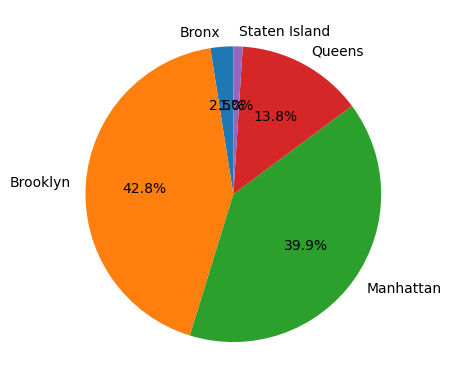

In [94]:
plt.pie( neighbourhood_stats['total_reviews'],labels=neighbourhood_stats['neighbourhood_group'], autopct='%1.1f%%', startangle=90)

In [98]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

In [96]:
pip install ydata_profiling

     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/149.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 149.4/149.4 kB 2.2 MB/s eta 0:00:00
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   --------------------------------------  348.2/356.2 kB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 356.2/356.2 kB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------- ----- 256.0/296.5 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 296.5/296.5 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   --------------- ------------------------ 256.0/667.1 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------  

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]